<a href="https://colab.research.google.com/github/siyaboban/Crop-recommendation/blob/main/Crop__recommendation_code_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as crs_pd
import numpy as crs_np

In [96]:
crs_df=crs_pd.read_csv("/content/Crop_recommendation.csv")

In [97]:
crs_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [98]:
crs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [99]:
# Check for null values in each column
crs_df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [100]:
#check for statistical properties
crs_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [101]:
#check for any duplicates values
crs_df.duplicated().sum()

0

In [102]:
import matplotlib.pyplot as crs_plt
import seaborn as crs_sns

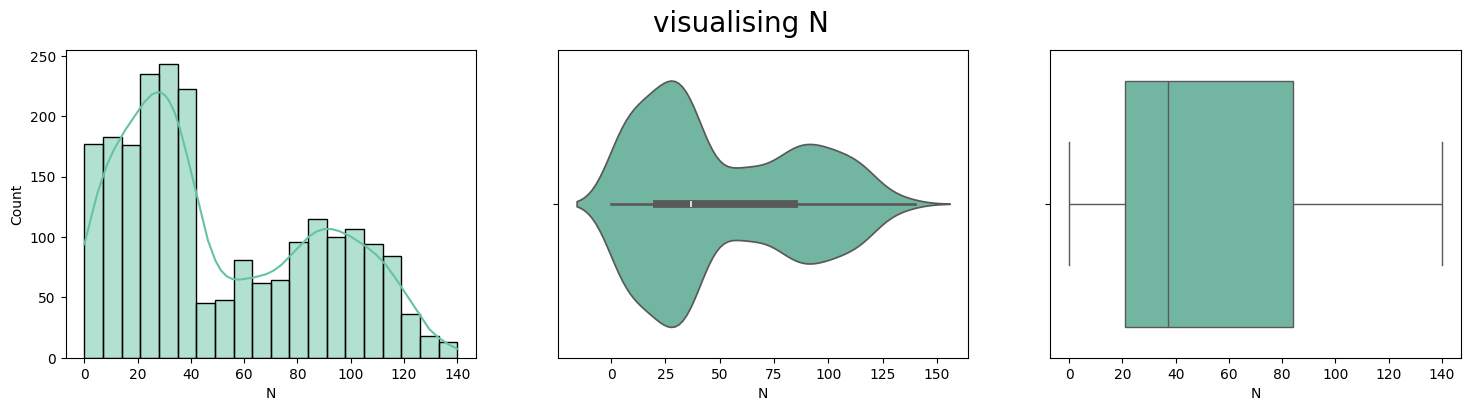

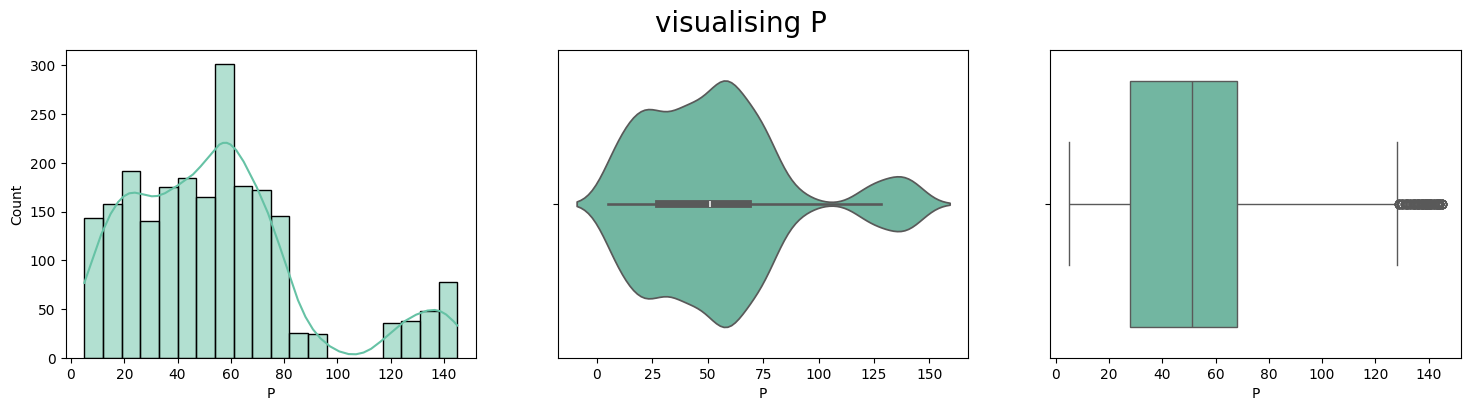

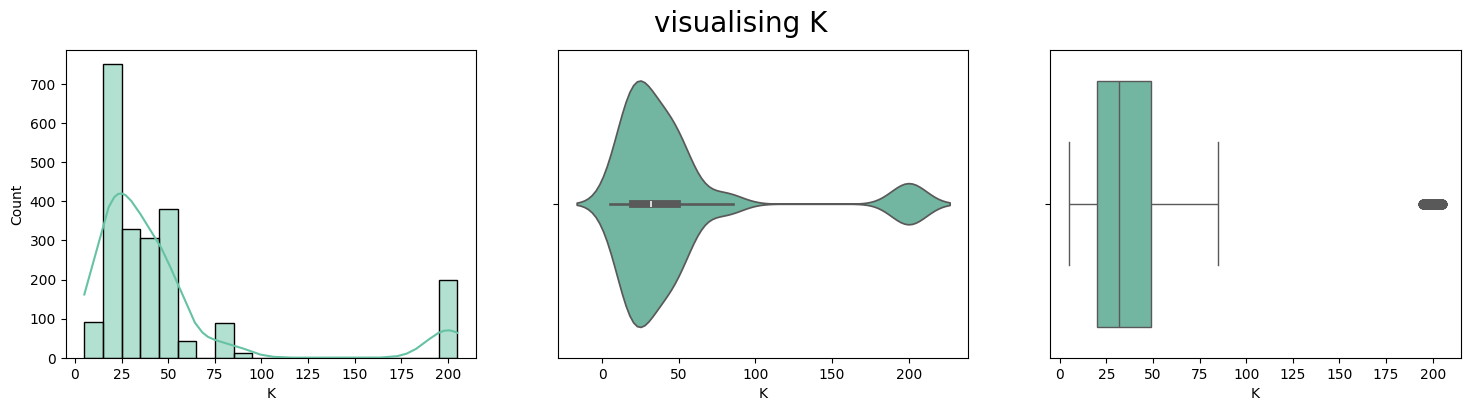

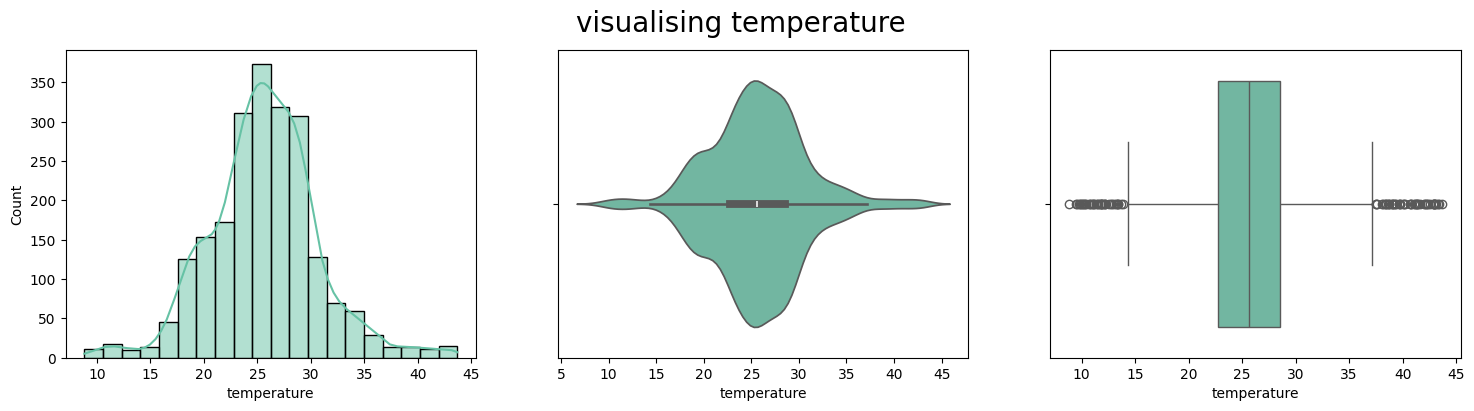

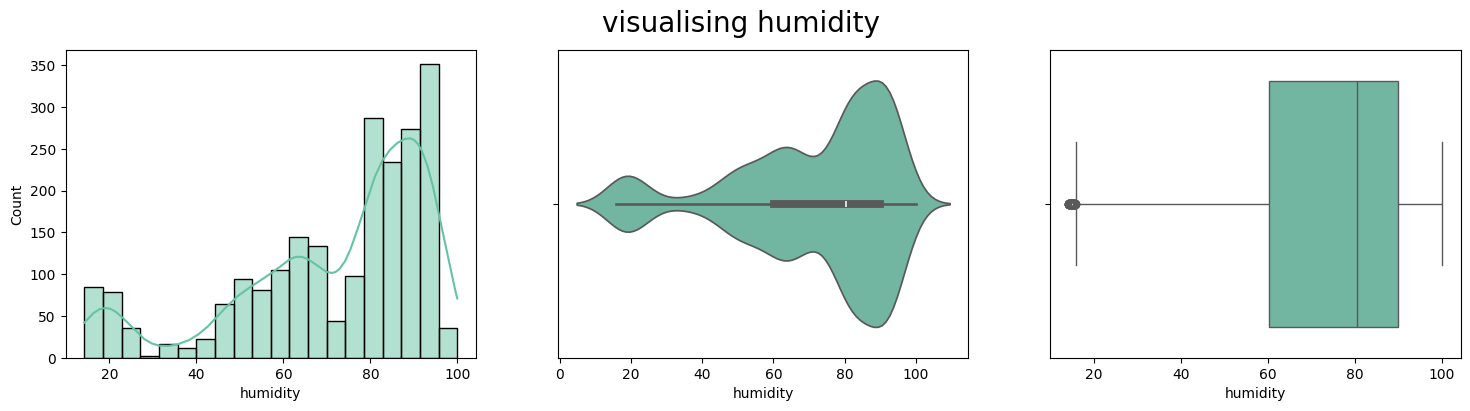

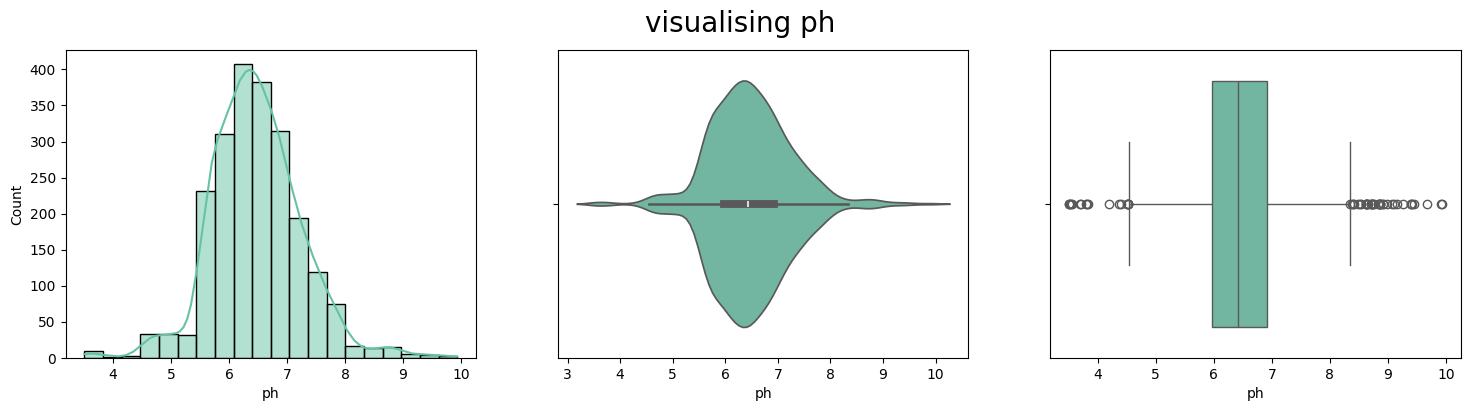

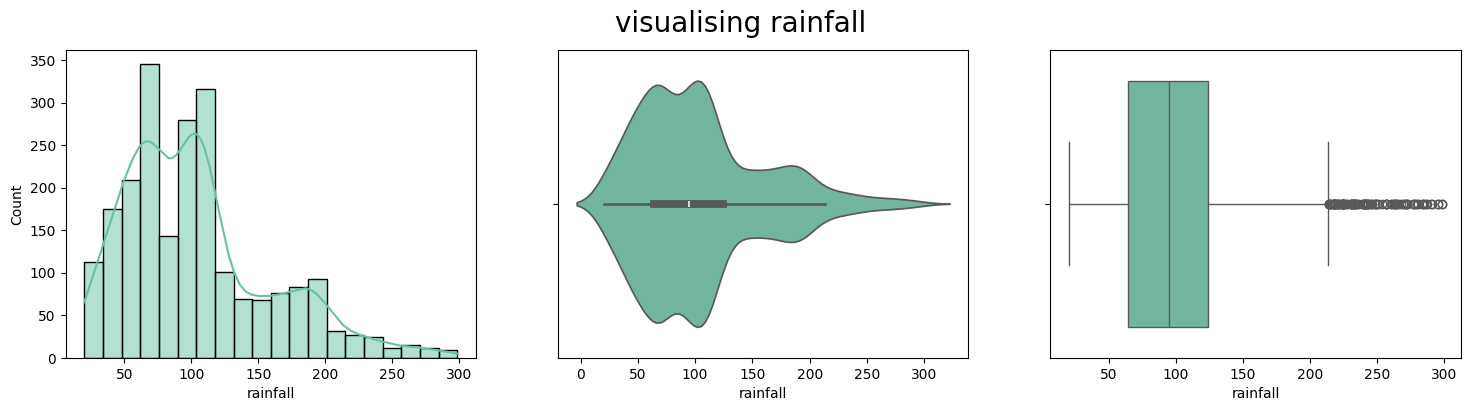

In [103]:
crs_plt.style.use('fast')
crs_sns.set_palette("Set2")
for i in crs_df.columns[:-1]:
  fig,ax=crs_plt.subplots(1,3,figsize=(18,4))
  crs_sns.histplot(data=crs_df, x=i, kde=True, bins=20,ax=ax[0])
  crs_sns.violinplot(data=crs_df, x=i,ax=ax[1])
  crs_sns.boxplot(data=crs_df, x=i, ax=ax[2])
  crs_plt.suptitle(f'visualising {i}', size=20)

In [104]:
crs_corr = crs_df.drop(['label'], axis=1).corr()
crs_corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

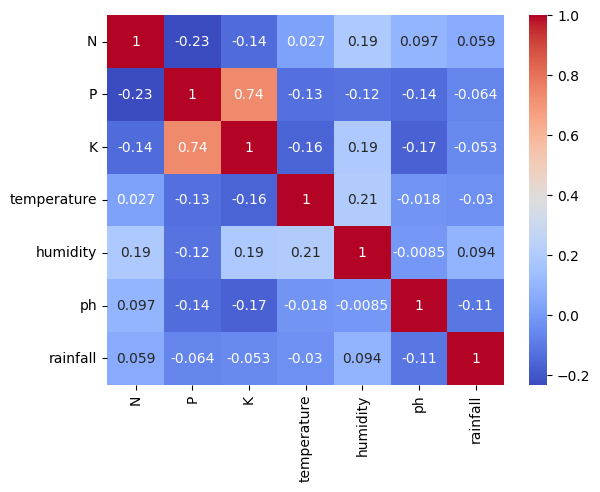

In [105]:
crs_sns.heatmap(crs_corr, annot= True, cbar= True, cmap= 'coolwarm')

In [106]:
crs_df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


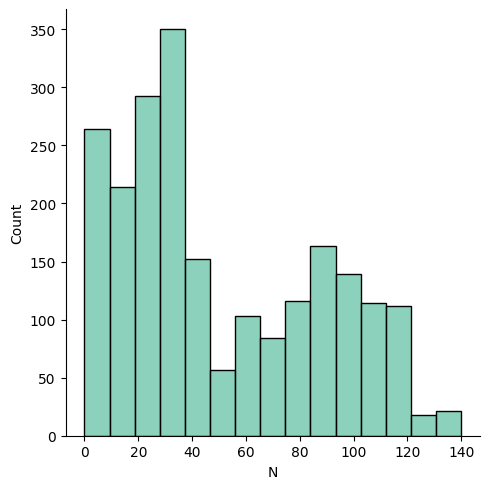

In [107]:
crs_sns.displot(crs_df['N'])

In [108]:
#Converting Categorical varibales to a integer format

crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crs_df['crop_num']=crs_df['label'].map(crop_dict)
crs_df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [109]:
# Removing Label column from the dataset

crs_df= crs_df.drop('label', axis=1)
crs_df

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [110]:
crs_df.shape

(2200, 8)

In [111]:
crs_df.to_csv("cleaned_crs_df.csv", index = False)


**ML Model Implementation**

In [112]:
crs_Ip = crs_df.drop('crop_num',axis=1)
crs_Op = crs_df['crop_num']

In [113]:
from sklearn.model_selection import train_test_split as crs_split

crs_Xtrain, crs_Xtest, crs_Ytrain, crs_Ytest = crs_split(crs_Ip, crs_Op, test_size=0.2, random_state= 30)
crs_Xval, crs_Xtest, crs_Yval, crs_Ytest = crs_split(crs_Xtest, crs_Ytest, test_size= 0.5, random_state= 30)

In [114]:
print("\nTraining Shape    :", crs_Xtrain.shape)
print("\nValidation Shape  :", crs_Xval.shape)
print("\nTesting Shape     :", crs_Xtest.shape)


Training Shape    : (1760, 7)

Validation Shape  : (220, 7)

Testing Shape     : (220, 7)


In [115]:
from sklearn.metrics import confusion_matrix as crs_confusM
from sklearn.metrics import ConfusionMatrixDisplay as crs_disp
from sklearn.metrics import classification_report as crs_rep
from sklearn import metrics as crs_Mt
import matplotlib.pyplot as crs_plt
import time as crs_time
import warnings as crs_wgs
crs_wgs.filterwarnings("ignore")

Random Forest Classifier


In [116]:
from sklearn.ensemble import RandomForestClassifier as crs_rf
from sklearn.model_selection import RandomizedSearchCV as crs_rsv
parameters = {'n_estimators': [20, 40, 80, 100],
                   'criterion': ['gini', 'entropy', 'log_loss'],
                   'max_depth': [3, 7, 9, 12]}


# Initialize the RandomForestClassifier
model = crs_rf(random_state= 40)

# Initialize RandomizedSearchCV with the model and parameters
random_search = crs_rsv(model, parameters, cv=2, verbose=10)

# Fit the RandomizedSearchCV object to the data
random_search.fit(crs_Xtrain,crs_Ytrain)

print("\nRandom Forest Parameters selected by Random Search :")
print(random_search.best_params_)
print("\nRandom Forest Score: ", random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START criterion=gini, max_depth=9, n_estimators=80...............
[CV 1/2; 1/10] END criterion=gini, max_depth=9, n_estimators=80;, score=0.993 total time=   0.3s
[CV 2/2; 1/10] START criterion=gini, max_depth=9, n_estimators=80...............
[CV 2/2; 1/10] END criterion=gini, max_depth=9, n_estimators=80;, score=0.990 total time=   0.3s
[CV 1/2; 2/10] START criterion=log_loss, max_depth=3, n_estimators=100..........
[CV 1/2; 2/10] END criterion=log_loss, max_depth=3, n_estimators=100;, score=0.927 total time=   0.3s
[CV 2/2; 2/10] START criterion=log_loss, max_depth=3, n_estimators=100..........
[CV 2/2; 2/10] END criterion=log_loss, max_depth=3, n_estimators=100;, score=0.953 total time=   0.3s
[CV 1/2; 3/10] START criterion=entropy, max_depth=9, n_estimators=80............
[CV 1/2; 3/10] END criterion=entropy, max_depth=9, n_estimators=80;, score=0.995 total time=   0.3s
[CV 2/2; 3/10] START criterion=entro

Training Process : 0.2308359146118164 Seconds

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00 

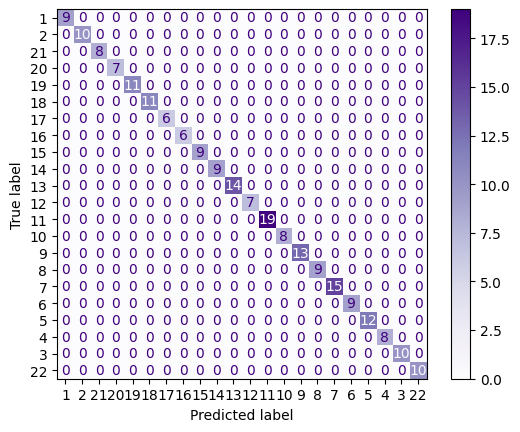

In [117]:
# Training Process
time1 = crs_time.time()
model = crs_rf(**random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval,y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         5
          18       1.00    

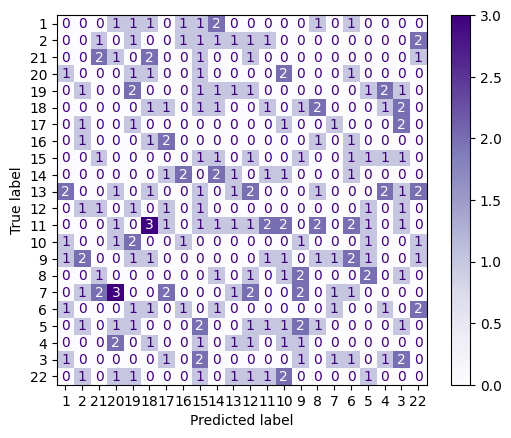

In [118]:
### Testing Process
time1 = crs_time.time()
y_pred = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier as crs_dt

# Initialize the DecisionTreeClassifier
dt_model = crs_dt(random_state=40)

# Define the parameters for RandomizedSearchCV for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV with the Decision Tree model and parameters
dt_random_search = crs_rsv(dt_model, dt_params, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
dt_random_search.fit(crs_Xtrain,crs_Ytrain)

print("\nDecision Tree Parameters selected by Randomized Search:")
print(dt_random_search.best_params_)
print("\nDecision Tree Score: ", dt_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Decision Tree Parameters selected by Randomized Search:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}

Decision Tree Score:  0.9159090909090908


Training Process : 0.021897315979003906 Seconds

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        10
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         7
           5       0.15      0.18      0.17        11
           6       0.08      0.09      0.08        11
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.06      0.11      0.08         9
          10       0.18      0.22      0.20         9
          11       0.12      0.07      0.09        14
          12       0.00      0.00      0.00         7
          13       0.25      0.11      0.15        19
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         9
          17       0.20      0.0

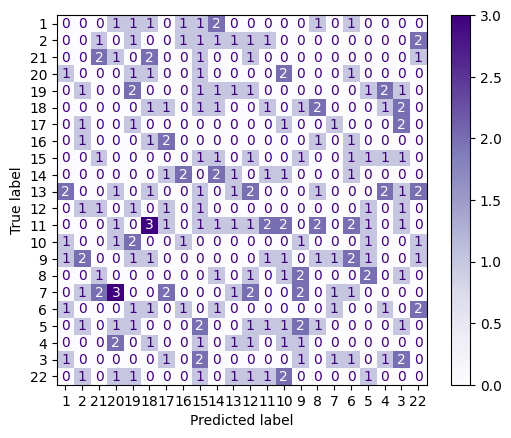

In [120]:
# Training Process
time1 = crs_time.time()
model = crs_dt(**dt_random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

### Validation process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.75      1.00      0.86         9
           3       1.00      0.50      0.67         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       0.88      0.64      0.74        11
          16       0.90      1.00      0.95         9
          17       1.00      1.00      1.00         5
          18       0.69    

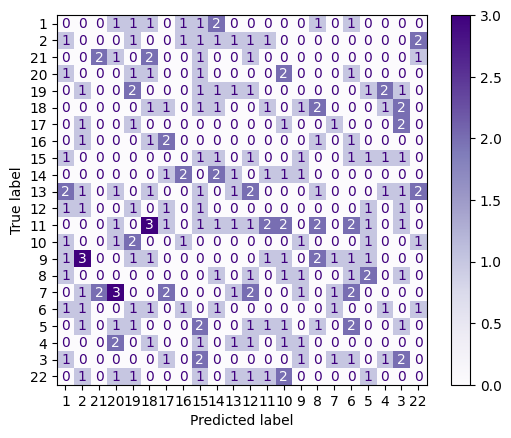

In [121]:
# Testing Process
time1 = crs_time.time()
y_pred = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

Support Vector Classifier

In [122]:
from sklearn.svm import SVC as crs_svc

# Initialize the SVM classifier
svm_model = crs_svc(random_state=40)

# Define the parameters for GridSearchCV for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with the SVM model and parameters
svm_grid_search = crs_rsv(svm_model, svm_params, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
svm_grid_search.fit(crs_Xtrain, crs_Ytrain)

print("\nSVM Parameters selected by Random Search:")
print(svm_grid_search.best_params_)
print("\nSVM Score: ", svm_grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

SVM Parameters selected by Random Search:
{'kernel': 'linear', 'gamma': 'scale', 'C': 1}

SVM Score:  0.9835227272727274


Training Process : 0.02620673179626465 Seconds

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00

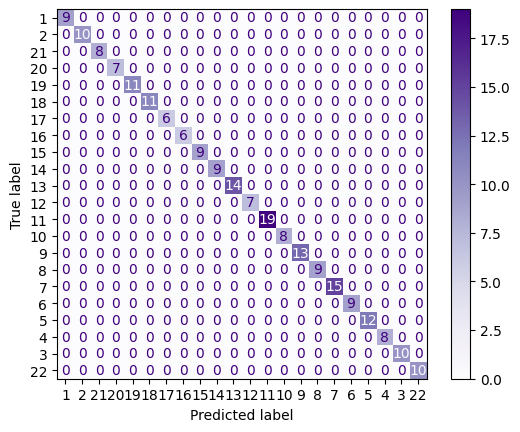

In [123]:
# Training Process
time1 = crs_time.time()
model = crs_svc(**svm_grid_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         9
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         5
          18       1.00    

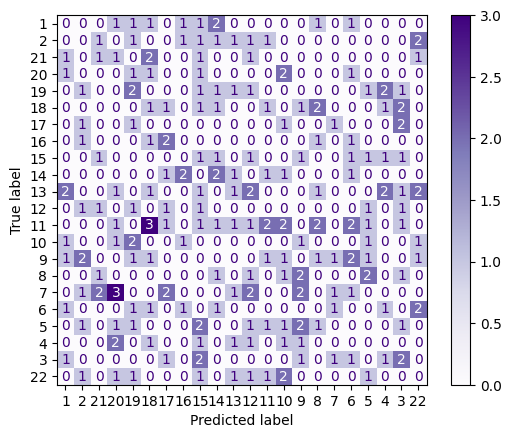

In [124]:
# Testing Process
time1 = crs_time.time()
y_pred = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

KNN


In [125]:
from sklearn.neighbors import KNeighborsClassifier as crs_knn

# Initialize the KNN classifier
knn_model = crs_knn()

# Define the parameters for RandomizedSearchCV for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize RandomizedSearchCV with the KNN model and parameters
knn_random_search = crs_rsv(knn_model, knn_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
knn_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nKNN Parameters selected by Randomized Search:")
print(knn_random_search.best_params_)
print("\nKNN Score: ", knn_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

KNN Parameters selected by Randomized Search:
{'weights': 'distance', 'p': 1, 'n_neighbors': 3}

KNN Score:  0.9829545454545453


Training Process : 0.00673675537109375 Seconds

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      0.90      0.95        10
           3       0.89      1.00      0.94         8
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00

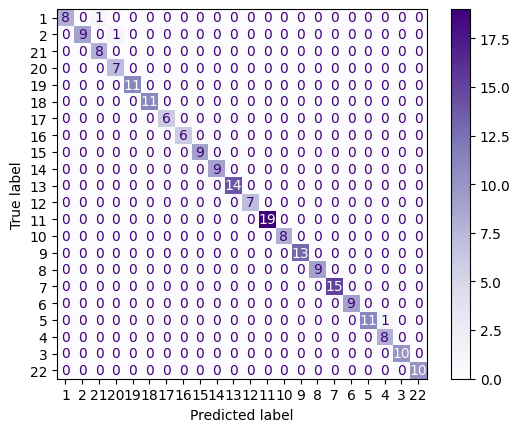

In [127]:
# Training Process
time1 = crs_time.time()
model = crs_knn(**knn_random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.22      0.25      0.24         8
           4       0.00      0.00      0.00        12
           5       0.18      0.15      0.17        13
           6       0.09      0.08      0.08        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         6
           9       0.11      0.06      0.08        16
          10       0.22      0.18      0.20        11
          11       0.07      0.12      0.09         8
          12       0.00      0.00      0.00        13
          13       0.11      0.25      0.15         8
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         9
          17       0.07      0.20      0.10         5
          18       0.00    

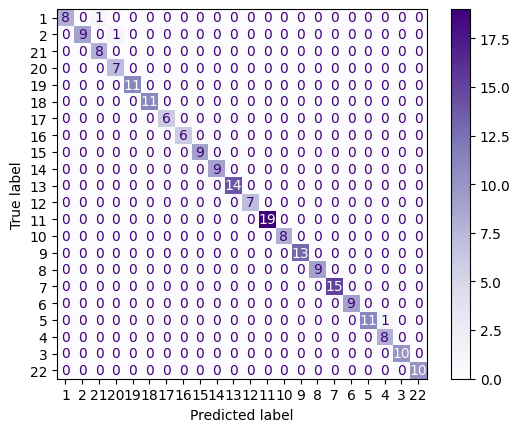

In [129]:
# Testing Process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = crs_df['crop_num'].unique()

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

**BOOSTING ALGORITHMS**

XGBoost Implementation

In [133]:
!pip install xgboost

In [131]:
import xgboost as crs_xgb

In [135]:
# Define the parameters for RandomizedSearchCV
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Assuming Ytrain is a pandas Series, adjust labels to start from 0
crs_Ytrain = crs_Ytrain - 1

# Remove instances with class 22 if they are not relevant
crs_Ytrain = crs_Ytrain[crs_Ytrain != 21] # 21 is the new label for class 22 after adjustment

# Re-index the data after removing instances
crs_Xtrain = crs_Xtrain.loc[crs_Ytrain.index]

# Initialize the XGBoost classifier
xgb_model = crs_xgb.XGBClassifier(random_state=40, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV with the model and parameters
# n_iter controls the number of random combinations to try
xgb_random_search = crs_rsv(xgb_model, xgb_params, n_iter=10, cv=2, verbose=10, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
xgb_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nXGBoost Parameters selected by Randomized Search:")
print(xgb_random_search.best_params_)
print("\nXGBoost Score: ", xgb_random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits

XGBoost Parameters selected by Randomized Search:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

XGBoost Score:  0.9916595720528975


Training Process : 3.267087697982788 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       9.0
           2       0.00      0.00      0.00      10.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00       7.0
           5       0.00      0.00      0.00      11.0
           6       0.00      0.00      0.00      11.0
           7       0.00      0.00      0.00       6.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00       9.0
          10       0.00      0.00      0.00       9.0
          11       0.00      0.00      0.00      14.0
          12       0.00      0.00      0.00       7.0
          13       0.00      0.00      0.00      19.0
          14       0.00      0.00      0.00       8.0
          15       0.00      0.00      0.00      13.0
          16       0.00      0.00  

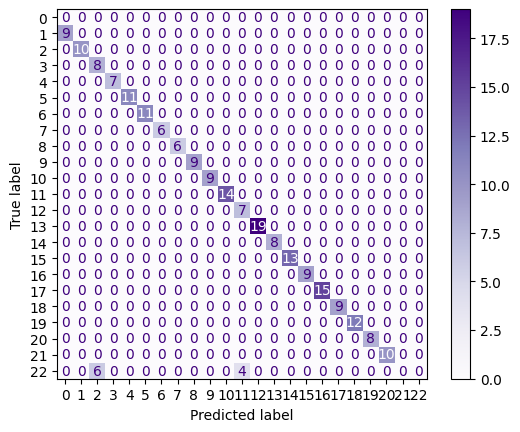

In [137]:
# Training Process
time1 = crs_time.time()
model = crs_xgb.XGBClassifier(**xgb_random_search.best_params_)
model.fit(crs_Xtrain,crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(y_pred)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = crs_np.unique(crs_Yval)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         7
           2       0.07      0.11      0.09         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        13
           7       0.33      0.22      0.27         9
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        11
          11       0.09      0.12      0.11         8
          12       0.05      0.08      0.06        13
          13       0.00      0.00      0.00         8
          14       0.08      0.08      0.08        12
          15       0.22      0.18      0.20        11
          16       0.00      0.00      0.00         9
          17       0.11    

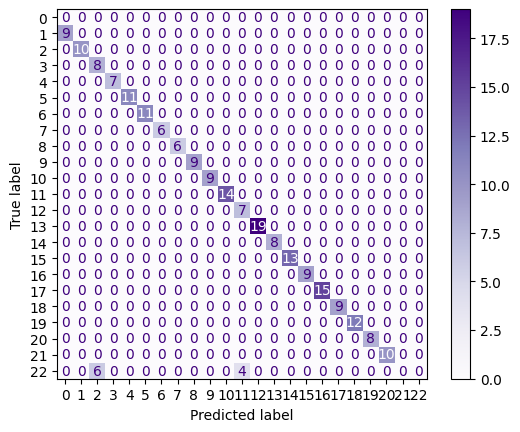

In [139]:
# Testing Process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

Light GBM

In [140]:
!pip install lightgbm

In [141]:
import lightgbm as crs_lgb

In [142]:
# Initialize the LightGBM classifier
lgb_model = crs_lgb.LGBMClassifier(random_state=40)

# Define the parameters for RandomizedSearchCV for LightGBM
lgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'num_leaves': [31, 63],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize RandomizedSearchCV with the LightGBM model and parameters
lgb_random_search = crs_rsv(lgb_model, lgb_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
lgb_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nLightGBM Parameters selected by Randomized Search:")
print(lgb_random_search.best_params_)
print("\nLightGBM Score: ", lgb_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[Lig

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] 

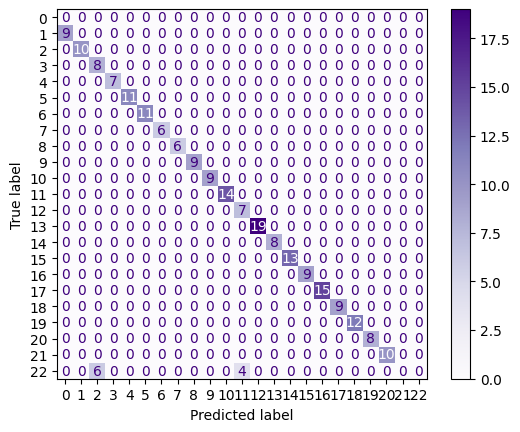

In [144]:
### Training Process
time1 = crs_time.time()
model = crs_lgb.LGBMClassifier(**lgb_random_search.best_params_)
model.fit(crs_Xtrain, crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

### Validation process
time1 = crs_time.time()
y_pdct = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(y_pred)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = crs_np.unique(crs_Yval)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

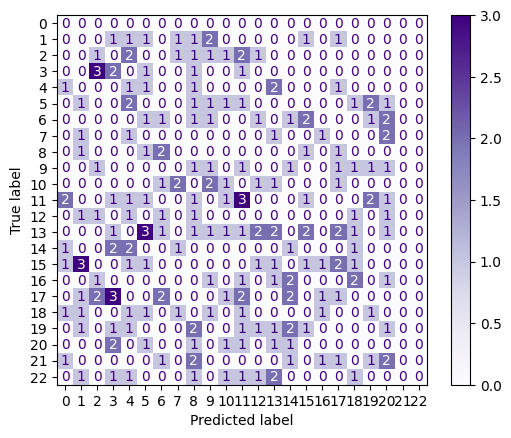

In [147]:
### Testing Process
time1 = crs_time.time()
y_pred = model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

Catboost

In [148]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


In [149]:
from catboost import CatBoostClassifier as crs_cat

# Initialize the CatBoost classifier
catboost_model = crs_cat(random_state=40, verbose=0)  # Suppress verbose output during training

# Define the parameters for RandomizedSearchCV for CatBoost
catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.05],
    'depth': [3, 5],
    'l2_leaf_reg': [1, 3]
}

# Initialize RandomizedSearchCV with the CatBoost model and parameters
catboost_random_search = crs_rsv(catboost_model, catboost_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
catboost_random_search.fit(crs_Xtrain, crs_Ytrain)

print("\nCatBoost Parameters selected by Randomized Search:")
print(catboost_random_search.best_params_)
print("\nCatBoost Score: ", catboost_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

CatBoost Parameters selected by Randomized Search:
{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 3}

CatBoost Score:  0.9928518123667377


0:	learn: 2.8363326	total: 9.96ms	remaining: 1.98s
1:	learn: 2.6420603	total: 16.4ms	remaining: 1.62s
2:	learn: 2.4921504	total: 30.6ms	remaining: 2.01s
3:	learn: 2.3454367	total: 43.5ms	remaining: 2.13s
4:	learn: 2.2573671	total: 50.7ms	remaining: 1.98s
5:	learn: 2.1404420	total: 60.4ms	remaining: 1.95s
6:	learn: 2.0505432	total: 72.4ms	remaining: 2s
7:	learn: 1.9451618	total: 90ms	remaining: 2.16s
8:	learn: 1.8649054	total: 99.2ms	remaining: 2.1s
9:	learn: 1.8181254	total: 105ms	remaining: 2s
10:	learn: 1.7538761	total: 112ms	remaining: 1.92s
11:	learn: 1.6780564	total: 118ms	remaining: 1.85s
12:	learn: 1.6039326	total: 126ms	remaining: 1.81s
13:	learn: 1.5372333	total: 135ms	remaining: 1.8s
14:	learn: 1.4829676	total: 149ms	remaining: 1.84s
15:	learn: 1.4438492	total: 166ms	remaining: 1.91s
16:	learn: 1.4004968	total: 179ms	remaining: 1.92s
17:	learn: 1.3515871	total: 192ms	remaining: 1.94s
18:	learn: 1.2908991	total: 210ms	remaining: 2s
19:	learn: 1.2389902	total: 221ms	remaining: 

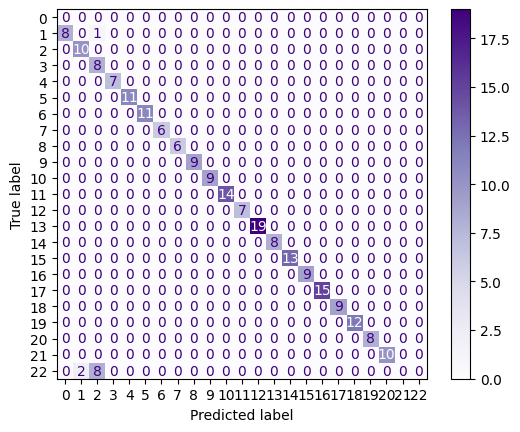

In [151]:
### Training Process
time1 = crs_time.time()
model = crs_cat(**catboost_random_search.best_params_)
model.fit(crs_Xtrain,crs_Ytrain)
time2 = crs_time.time()
print("Training Process :", time2-time1, "Seconds\n")

### Validation process
time1 = crs_time.time()
y_pred = model.predict(crs_Xval)
print(crs_rep(crs_Yval, y_pred))
time2 = crs_time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(y_pred)

# Get all unique actual labels (assuming Yval contains all possible labels)
actual_labels = crs_np.unique(crs_Yval)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix =crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

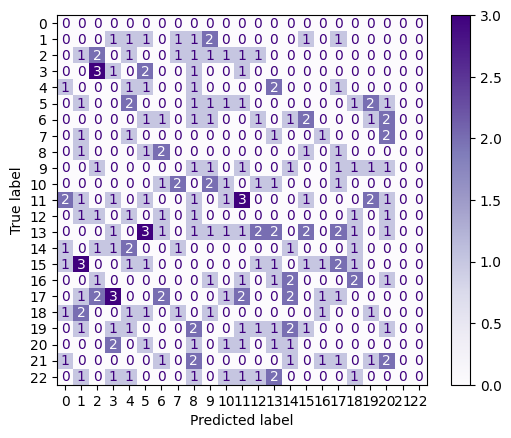

In [153]:
### Testing Process
time1 = crs_time.time()
y_pred =model.predict(crs_Xtest)
print(crs_rep(crs_Ytest, y_pred))
time2 = crs_time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yval, y_pred)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

Transformer Models

In [156]:
import tensorflow as crs_TFlow

from tensorflow.keras.layers import Reshape as reshape
from tensorflow.keras.layers import Attention as cr_Attention
from tensorflow.keras.layers import Concatenate as Concatenate
from tensorflow.keras.layers import GlobalAveragePooling1D as GAPooling
from tensorflow.keras.models import Model as Model
from tensorflow.keras.optimizers import Adam as Adam
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report as cr
import matplotlib.pyplot as plt

In [157]:
crs_Ip = crs_df.drop('crop_num',axis=1)
crs_Op = crs_df['crop_num']

In [158]:
from sklearn.model_selection import train_test_split as crs_split

crs_Xtrain, crs_Xtest, crs_Ytrain, crs_Ytest = crs_split(crs_Ip, crs_Op, test_size=0.2, random_state= 30)
crs_Xval, crs_Xtest, crs_Yval, crs_Ytest = crs_split(crs_Xtest, crs_Ytest, test_size= 0.5, random_state= 30)

In [159]:
import warnings as wgs
wgs.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.optimizers import Adam as crs_Adam

crs_time_1 = crs_time.time()

AAAA_IN_L = III(shape=(crs_Xtrain.shape[1],))
AAAA_IN_RE = crs_reshape((crs_Xtrain.shape[1], 1))(AAAA_IN_L)

AAAA_IN_ATN = crs_TFlo.keras.layers.Attention()([AAAA_IN_RE, AAAA_IN_RE])

AAAA_RR_ATN = crs_reshape((-1, crs_Xtrain.shape[1]))(AAAA_IN_ATN)

AAAA_AG_G = crs_GAPooling()(AAAA_RR_ATN)

AAAA_OUT_L = DDD(crop_cn, activation='softmax')(AAAA_AG_G)

crs_modl = crsMdl(inputs=AAAA_IN_L, outputs=AAAA_OUT_L)

crs_modl.compile(optimizer=crs_ppp(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_modl.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xva_agi, crs_Yva_agi))

crs_time_2 = crs_time.time()
print("Training Process :", crs_time_2-crs_time_1, "Seconds\n")

####################  Validation Process ------------
crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xval)
crs_time_2 = crs_time.time()
print("Validation Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Yval, crs_y_pdct))

crs_confM = crs_cfm(crs_Yval, crs_y_pdct)
crs_dply(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()
####################  Testing Process ------------

crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xtest)
crs_time_2 = crs_time.time()
print("Testing Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Ytest, crs_y_pdct))

crs_confM = crs_cfms_agi(crs_Ytest, crs_y_pdct)
crs_dply(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

NameError: name 'crs_tm_agi' is not defined

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.0546 - loss: 152.7775 - val_accuracy: 0.0409 - val_loss: 109.6430
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0435 - loss: 112.5734 - val_accuracy: 0.0273 - val_loss: 145.1676
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0452 - loss: 166.9821 - val_accuracy: 0.0500 - val_loss: 225.8243
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0495 - loss: 268.7182 - val_accuracy: 0.0455 - val_loss: 334.1774
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0467 - loss: 380.5608 - val_accuracy: 0.0318 - val_loss: 421.8845
Training Process : 3.9832911491394043 Seconds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Validation Process : 0.42653465270996094 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
       

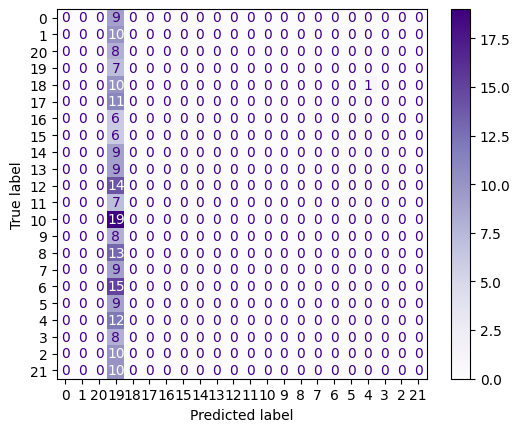

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing Process : 0.09934449195861816 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.06      1.00      0.11        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00       

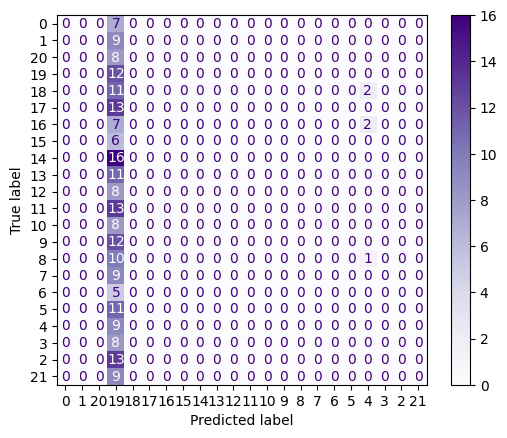

In [ ]:
from tensorflow.keras.optimizers import Adamax as crs_ppp

crs_time_1 = crs_time.time()

AAAA_IN_L = III(shape=(crs_Xtrain.shape[1],))

AAAA_IN_RE = crs_reshape((crs_Xtrain.shape[1], 1))(AAAA_IN_L)

AAAA_IN_ATN = crs_TFlo.keras.layers.Attention()([AAAA_IN_RE, AAAA_IN_RE])

AAAA_RR_ATN = crs_reshape((-1, crs_Xtrain.shape[1]))(AAAA_IN_ATN)

AAAA_AG_G = crs_GAPooling()(AAAA_RR_ATN)

AAAA_OUT_L = DDD(crop_cn, activation='softmax')(AAAA_AG_G)

crs_modl = crsMdl(inputs=AAAA_IN_L, outputs=AAAA_OUT_L)

crs_modl.compile(optimizer=crs_ppp(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_modl.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xva_agi, crs_Yva_agi))

crs_time_2 = crs_time.time()
print("Training Process :", crs_time_2-crs_time_1, "Seconds\n")

####################  Validation Process ------------
crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xval)
crs_time_2 = crs_time.time()
print("Validation Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Yval, crs_y_pdct))

crs_confM = crs_cfms(crs_Yval, crs_y_pdct)
crs_dpl(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()
####################  Testing Process ------------

crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xtest)
crs_time_2 = crs_time.time()
print("Testing Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Ytest, crs_y_pdct))

crs_confM = crs_cfms(crs_Ytest, crs_y_pdct)
crs_dply(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.0450 - loss: 183.6079 - val_accuracy: 0.0455 - val_loss: 296.5492
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0555 - loss: 281.9995 - val_accuracy: 0.0500 - val_loss: 388.3561
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0400 - loss: 398.3263 - val_accuracy: 0.0273 - val_loss: 566.7842
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0433 - loss: 586.9890 - val_accuracy: 0.0591 - val_loss: 861.0447
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0303 - loss: 843.5162 - val_accuracy: 0.0455 - val_loss: 995.5743
Training Process : 1.921922206878662 Seconds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Validation Process : 0.40193963050842285 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
         

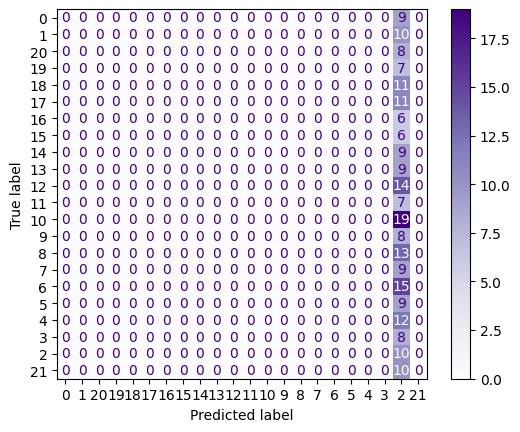

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing Process : 0.13022351264953613 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00       

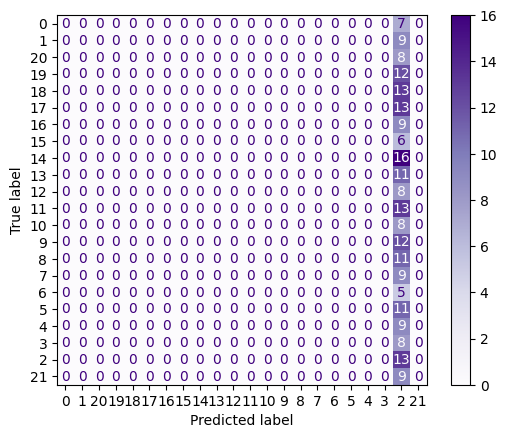

In [ ]:
from tensorflow.keras.optimizers import RMSprop as crs_ppp

crs_time_1 = crs_time.time()

AAAA_IN_L = III(shape=(crs_Xtrain.shape[1],))
AAAA_IN_RE = crs_reshape((crs_Xtrain.shape[1], 1))(AAAA_IN_L)

AAAA_IN_ATN = crs_TFlo.keras.layers.Attention()([AAAA_IN_RE, AAAA_IN_RE])

AAAA_RR_ATN = crs_reshape((-1, crs_train_agi.shape[1]))(AAAA_IN_ATN)

AAAA_AG_G = crs_GAPooling()(AAAA_RR_ATN)

AAAA_OUT_L = DDD(crop_cn, activation='softmax')(AAAA_AG_G)

crs_modl = crsMdl(inputs=AAAA_IN_L, outputs=AAAA_OUT_L)

crs_modl.compile(optimizer=crs_ppp(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_modl.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xval, crs_Yval))

crs_time_2 = crs_time.time()
print("Training Process :", crs_time_2-crs_time_1, "Seconds\n")

####################  Validation Process ------------
crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva_agi)
crs_time_2 = crs_time.time()
print("Validation Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Yval, crs_y_pdct))

crs_confM = crs_cfms(crs_Yval, crs_y_pdct)
crs_dply_agi(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_pypt_agi.show()
####################  Testing Process ------------

crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xtest)
crs_time_2 = crs_time.time()
print("Testing Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Ytest, crs_y_pdct))

crs_confM = crs_cfms(crs_Ytest, crs_y_pdct)
crs_dply(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.0479 - loss: 831.7743 - val_accuracy: 0.0364 - val_loss: 3362.2166
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0371 - loss: 4169.0376 - val_accuracy: 0.0500 - val_loss: 5463.7046
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0521 - loss: 5304.4893 - val_accuracy: 0.0409 - val_loss: 4998.7944
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0454 - loss: 5429.1582 - val_accuracy: 0.0455 - val_loss: 5808.8164
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0472 - loss: 5758.8960 - val_accuracy: 0.0273 - val_loss: 6347.4224
Training Process : 2.502499580383301 Seconds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Process : 0.1905994415283203 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8


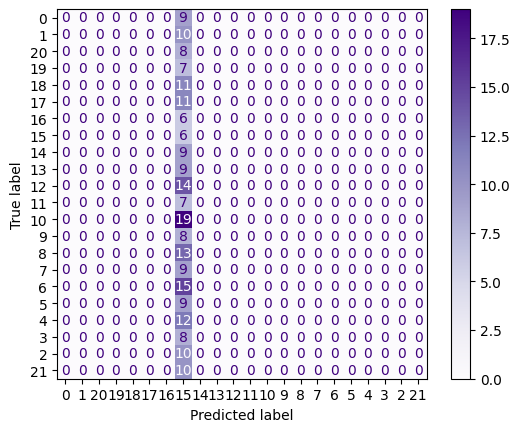

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Testing Process : 0.1868276596069336 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         9
           7       0.03      1.00      0.05         6
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        

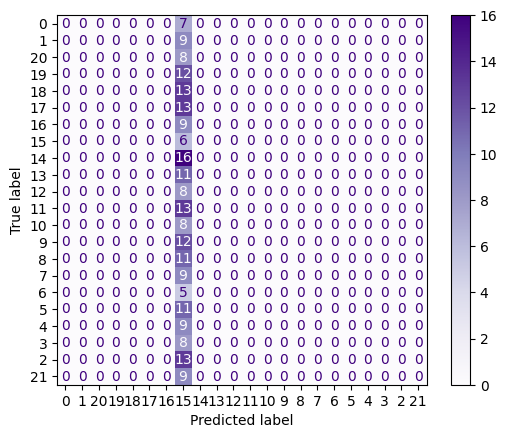

In [ ]:
from tensorflow.keras.optimizers import SGD as crs_ppp

crs_time_1 = crs_time.time()

AAAA_IN_L = III(shape=(crs_Xtrain.shape[1],))

AAAA_IN_RE = crs_reshape((crs_Xtrain.shape[1], 1))(AAAA_IN_L)

AAAA_IN_ATN = crs_TFlo.keras.layers.Attention()([AAAA_IN_RE, AAAA_IN_RE])

AAAA_RR_ATN = crs_reshape((-1, crs_Xtrain.shape[1]))(AAAA_IN_ATN)

AAAA_AG_G = crs_GAPooling()(AAAA_RR_ATN)

AAAA_OUT_L = DDD(crop_cn, activation='softmax')(AAAA_AG_G)

crs_modl = crs_Mdl(inputs=AAAA_IN_L, outputs=AAAA_OUT_L)

crs_modl.compile(optimizer=crs_ppp(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
crs_modl.fit(crs_Xtrain, crs_Ytrain, epochs=5, batch_size=500, validation_data=(crs_Xval, crs_Yval))

crs_time_2 = crs_time.time()
print("Training Process :", crs_time_2-crs_time_1, "Seconds\n")

####################  Validation Process ------------
crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xval)
crs_time_2 = crs_time.time()
print("Validation Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Yval, crs_y_pdct))

crs_confM = crs_cfms(crs_Yval, crs_y_pdct)
crs_dply(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()
####################  Testing Process ------------

crs_time_1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xtest)
crs_time_2 = crs_time.time()
print("Testing Process :", crs_time_2-crs_time_1, "Seconds\n")

crs_y_pdct = crs_Nump.argmax(crs_y_pdct, axis=1)
crop_labels = crs_df['crop_num'].unique()
print(crs_rpot(crs_Ytest, crs_y_pdct))

crs_confM = crs_cfms(crs_Ytest, crs_y_pdct)
crs_dply(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_plt.show()